In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
from keras import layers
pd.set_option('display.max_rows', 50)
from tensorflow.keras import optimizers
import random


2021-08-31 23:11:03.468868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 23:11:03.468930: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_merged = pd.read_csv("data_final_20210826_v3.csv")

In [3]:
# df_merged = df_merged.iloc[200:]

In [4]:
df_merged.columns

Index(['tweet_date', 'party', 'poll', 'reply_count', 'retweet_count',
       'like_count', 'avg_len_of_tweet', 'avg_followers_count',
       'avg_following_count', 'avg_user_tweet_count', 'avg_ff_ratio',
       'share_of_tweets', 'share_unique_users', 'weighted_sentiment',
       'share_of_positive_tweets', 'share_of_negative_tweets'],
      dtype='object')

In [5]:
selected_columns = ['tweet_date', 'party', 'poll', 'retweet_count',
       'like_count', 'avg_user_tweet_count', 'avg_ff_ratio',
       'share_of_tweets', 'share_unique_users', 'weighted_sentiment',
       'share_of_positive_tweets', 'share_of_negative_tweets']

In [6]:
df_merged = df_merged[selected_columns]

In [7]:
df_merged = df_merged.replace(np.nan, 0)

In [8]:
df_merged.isna().sum() / len(df_merged)

tweet_date                  0.0
party                       0.0
poll                        0.0
retweet_count               0.0
like_count                  0.0
avg_user_tweet_count        0.0
avg_ff_ratio                0.0
share_of_tweets             0.0
share_unique_users          0.0
weighted_sentiment          0.0
share_of_positive_tweets    0.0
share_of_negative_tweets    0.0
dtype: float64

In [9]:
df_merged = df_merged.replace(np.nan, 0)

In [10]:
num_features = [ "retweet_count", "like_count", "avg_user_tweet_count","avg_ff_ratio"]
remaing_columns = ["share_of_tweets","share_unique_users","weighted_sentiment","share_of_positive_tweets","share_of_negative_tweets"]

/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

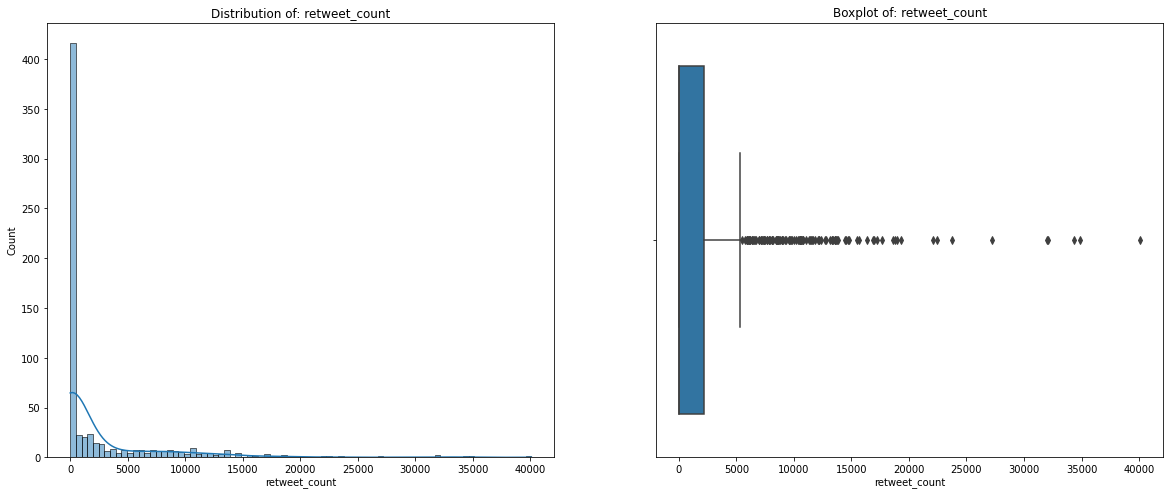

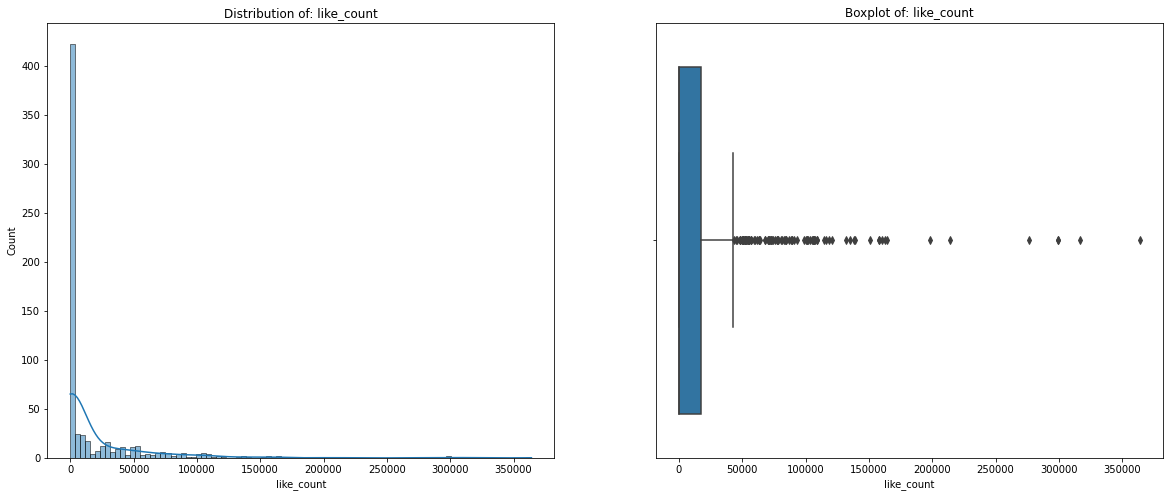

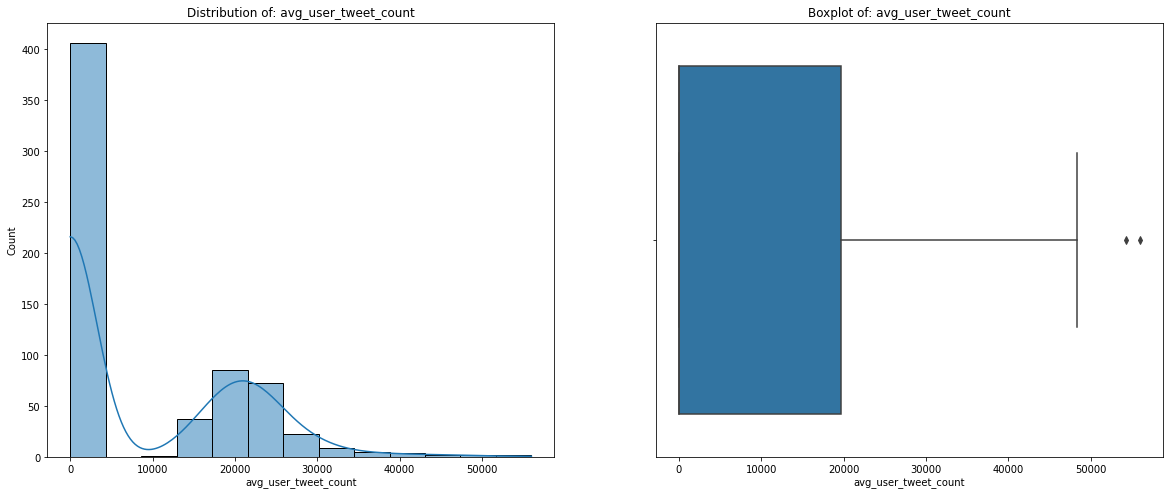

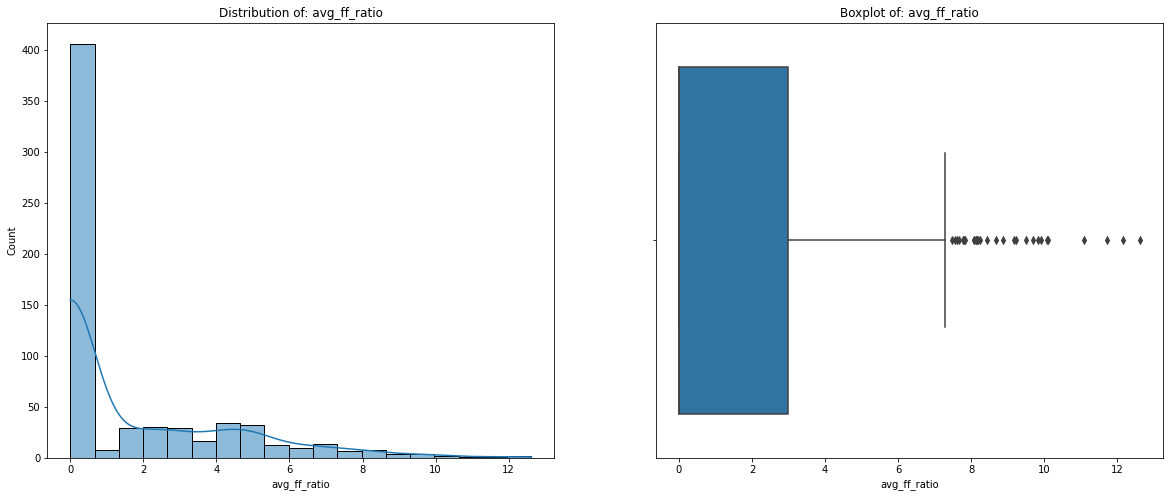

In [11]:
for _ in num_features:
    fig, ax =plt.subplots(1,2,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {_}")
    sns.histplot(data = df_merged[_], kde = True, ax = ax[0])
    ax[1].set_title(f"Boxplot of: {_}")
    sns.boxplot(df_merged[_], ax=ax[1])
    fig.show()

In [12]:
df_merged["tweet_date"] = pd.to_datetime(df_merged["tweet_date"])

In [13]:
df_merged = df_merged.groupby([pd.Grouper(key='tweet_date',freq='D'), "party"]).agg({
#     "reply_count": "sum", 
    "retweet_count": "sum",
    "like_count": "sum",
#     "avg_len_of_tweet": "mean" ,
#     "avg_followers_count": "mean" ,
#     "avg_following_count": "mean" ,
    "avg_user_tweet_count" :"mean",
    "avg_ff_ratio" :"mean",
    "share_of_tweets" :"mean",
    "share_unique_users": "mean",
    "weighted_sentiment" : "mean",
    "share_of_positive_tweets": "mean",
    "share_of_negative_tweets" : "mean",
    "poll": "mean"}) 

In [14]:
df_merged = df_merged.iloc[:-14]

In [15]:
def splitting_data(df):
    
    split_percentage = 0.98
    split_index = round(split_percentage * len(df)) 
    
    for num in range(split_index, split_index + 7):
        if df_merged[num:(num + 1)].index[0][1] == "AFD":
            split_index = num
        else:
            pass
    df_train = df[:split_index]
    df_test = df[split_index:]
    
    return df_train, df_test

In [16]:
df_train, df_test = splitting_data(df_merged)

In [17]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

mm_scaler.fit(df_train[num_features])

numerical_train_scaled = mm_scaler.transform(df_train[num_features])
numerical_test_scaled = mm_scaler.transform(df_test[num_features])

In [18]:
df_train_poll = df_train["poll"] / 100
df_test_poll = df_test["poll"] / 100

In [19]:
pd.DataFrame(numerical_train_scaled, columns = num_features, index = df_train.index)

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-05-26 AFD          0.000000    0.000000              0.000000   
           CDU          0.000000    0.000000              0.000000   
           FDP          0.000000    0.000000              0.000000   
           GRUENE       0.000000    0.000000              0.000000   
           LINKE        0.000000    0.000000              0.000000   
...                          ...         ...                   ...   
2021-08-23 FDP          0.058780    0.065651              0.373746   
           GRUENE       0.344522    0.280436              0.371575   
           LINKE        0.033891    0.027093              0.406994   
           OTHER        0.043068    0.024327              0.348279   
           SPD          0.223771    0.277553              0.397906   

                   avg_ff_ratio  
tweet_date party                 
2021-05-26 AFD         0.000000  
           CDU         0.000000  
           FDP         0.000000  
           GRUENE      0.000000  
           LINKE       0.000000  
...                         ...  
2021-08-23 FDP         0.347957  
           GRUENE      0.356309  
           LINKE       0.360115  
           OTHER       0.085154  
           SPD         0.461581  

[630 rows x 4 columns]

In [20]:
df_train_scaled = pd.concat([pd.DataFrame(numerical_train_scaled, columns = num_features, index = df_train.index),df_train[remaing_columns], pd.DataFrame(df_train_poll, columns = ["poll"], index = df_train.index)] , axis = 1)

In [21]:
df_train_scaled

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-05-26 AFD          0.000000    0.000000              0.000000   
           CDU          0.000000    0.000000              0.000000   
           FDP          0.000000    0.000000              0.000000   
           GRUENE       0.000000    0.000000              0.000000   
           LINKE        0.000000    0.000000              0.000000   
...                          ...         ...                   ...   
2021-08-23 FDP          0.058780    0.065651              0.373746   
           GRUENE       0.344522    0.280436              0.371575   
           LINKE        0.033891    0.027093              0.406994   
           OTHER        0.043068    0.024327              0.348279   
           SPD          0.223771    0.277553              0.397906   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-05-26 AFD         0.000000         0.000000            0.000000   
           CDU         0.000000         0.000000            0.000000   
           FDP         0.000000         0.000000            0.000000   
           GRUENE      0.000000         0.000000            0.000000   
           LINKE       0.000000         0.000000            0.000000   
...                         ...              ...                 ...   
2021-08-23 FDP         0.347957         0.074285            0.730539   
           GRUENE      0.356309         0.225808            0.577812   
           LINKE       0.360115         0.027255            0.594214   
           OTHER       0.085154         0.035424            0.569064   
           SPD         0.461581         0.153747            0.633745   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-05-26 AFD               0.000000                  0.000000   
           CDU               0.000000                  0.000000   
           FDP               0.000000                  0.000000   
           GRUENE            0.000000                  0.000000   
           LINKE             0.000000                  0.000000   
...                               ...                       ...   
2021-08-23 FDP              -0.530588                  0.056614   
           GRUENE           -0.140617                  0.056053   
           LINKE             0.017403                  0.054154   
           OTHER            -0.028883                  0.088470   
           SPD              -0.342489                  0.049842   

                   share_of_negative_tweets    poll  
tweet_date party                                     
2021-05-26 AFD                     0.000000  0.1050  
           CDU                     0.000000  0.2567  
           FDP                     0.000000  0.1283  
           GRUENE                  0.000000  0.2333  
           LINKE                   0.000000  0.0617  
...                                     ...     ...  
2021-08-23 FDP                     0.520142  0.1300  
           GRUENE                  0.399266  0.1700  
           LINKE                   0.354599  0.0700  
           OTHER                   0.378425  0.0600  
           SPD                     0.457654  0.2300  

[630 rows x 10 columns]

In [22]:
df_test_scaled = pd.concat([pd.DataFrame(numerical_test_scaled, columns = num_features, index = df_test.index),df_test[remaing_columns], pd.DataFrame(df_test_poll, columns = ["poll"], index = df_test.index)] , axis = 1)

In [23]:
def subsequence(df, length, start = 0):
    last_possible_start = len(df) - length 
    X = df[start:start + length]
    y = df["poll"][(start + length ) : (start + length + 7)]
    
    return X, y

In [24]:
def multiple_subsequences(df, length):
    
    list_of_X = []
    list_of_y = []
    
    number_of_subsequences = round(len(df) / length)
    start = 0
    for num in range(number_of_subsequences):
        temporary_X, temporary_y = subsequence(df, length, start)
        list_of_X.append(temporary_X)
        list_of_y.append(temporary_y)
        start = start + 7
    
    return list_of_X, list_of_y

    
    
    

In [25]:
df_train_scaled

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-05-26 AFD          0.000000    0.000000              0.000000   
           CDU          0.000000    0.000000              0.000000   
           FDP          0.000000    0.000000              0.000000   
           GRUENE       0.000000    0.000000              0.000000   
           LINKE        0.000000    0.000000              0.000000   
...                          ...         ...                   ...   
2021-08-23 FDP          0.058780    0.065651              0.373746   
           GRUENE       0.344522    0.280436              0.371575   
           LINKE        0.033891    0.027093              0.406994   
           OTHER        0.043068    0.024327              0.348279   
           SPD          0.223771    0.277553              0.397906   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-05-26 AFD         0.000000         0.000000            0.000000   
           CDU         0.000000         0.000000            0.000000   
           FDP         0.000000         0.000000            0.000000   
           GRUENE      0.000000         0.000000            0.000000   
           LINKE       0.000000         0.000000            0.000000   
...                         ...              ...                 ...   
2021-08-23 FDP         0.347957         0.074285            0.730539   
           GRUENE      0.356309         0.225808            0.577812   
           LINKE       0.360115         0.027255            0.594214   
           OTHER       0.085154         0.035424            0.569064   
           SPD         0.461581         0.153747            0.633745   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-05-26 AFD               0.000000                  0.000000   
           CDU               0.000000                  0.000000   
           FDP               0.000000                  0.000000   
           GRUENE            0.000000                  0.000000   
           LINKE             0.000000                  0.000000   
...                               ...                       ...   
2021-08-23 FDP              -0.530588                  0.056614   
           GRUENE           -0.140617                  0.056053   
           LINKE             0.017403                  0.054154   
           OTHER            -0.028883                  0.088470   
           SPD              -0.342489                  0.049842   

                   share_of_negative_tweets    poll  
tweet_date party                                     
2021-05-26 AFD                     0.000000  0.1050  
           CDU                     0.000000  0.2567  
           FDP                     0.000000  0.1283  
           GRUENE                  0.000000  0.2333  
           LINKE                   0.000000  0.0617  
...                                     ...     ...  
2021-08-23 FDP                     0.520142  0.1300  
           GRUENE                  0.399266  0.1700  
           LINKE                   0.354599  0.0700  
           OTHER                   0.378425  0.0600  
           SPD                     0.457654  0.2300  

[630 rows x 10 columns]

In [26]:
X_train , y_train = multiple_subsequences(pd.DataFrame(df_train_scaled), 35 )
X_test , y_test = multiple_subsequences(df_test_scaled, 35)

In [28]:
len(X_train)

18

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [30]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape

((18, 35, 10), (18, 7), (0,), (0,))

In [ ]:
# X_test = df_merged_test.to_numpy().reshape(1,7,14)
# X_train = df_merged.to_numpy().reshape(35,7,14)
# y_test = df_merged_test["poll"].to_numpy().reshape(18,7)
# y_train = y.to_numpy().reshape(4,7)

In [ ]:
# def subsequence(df, length):
#     X = []
#     y = []
#     counter = 0
#     counter_y = 21
#     last_possible = len(df) - length
#     subsequences = round(len(df) / (length) )
    
#     for num in range(subsequences - 1):
#         X.append(df[counter: counter + length])
#         y.append(df["poll"][counter_y: (counter_y + 7)])
#         counter = counter + 7
#         counter_y = counter_y + 7
    
#     return (X, y)

# X_train, y_train = subsequence(df_train, 3)
# X_test, y_test = subsequence(df_test, 3)

In [ ]:
# pd.DataFrame(y_testing.groupby(by = y_testing.index).mean()).set_index(y_testing.columns)

In [ ]:
# pd.DataFrame(y_testing.groupby(by = y_testing.index).mean().unstack()).set_index()

In [ ]:
# X_test = df_merged_test.to_numpy().reshape(1,7,14)
# X_train = df_merged.to_numpy().reshape(35,7,14)
# y_test = df_merged_test["poll"].to_numpy().reshape(1,7,1)
# y_train = y.to_numpy().reshape(93,7)

In [ ]:
# X_test = df_merged_test.to_numpy().reshape(1,7,14)
# X_train = df_merged.to_numpy().reshape(35,7,14)
# y_test = df_merged_test["poll"].to_numpy().reshape(1,7,1)
# y_train = y.to_numpy().reshape(93,7)

In [ ]:
model = Sequential()
model.add(layers.LSTM(units=18, activation='tanh', return_sequences=True))
model.add(layers.LSTM(units=64, activation='tanh', return_sequences=False))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(7, activation='relu'))


In [ ]:
%%time

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train ,
          epochs=30, 
          batch_size=1, 
          verbose=1, 
          validation_split=0.2,
          shuffle = False
     )



In [ ]:
model.evaluate(X_test, y_test )

In [ ]:
df_merged_final_day = np.array(df_test_scaled.iloc[-28:])
df_merged_final_day = np.expand_dims(df_merged_final_day, axis = 0)

In [ ]:
df_prediction = pd.DataFrame(model.predict(df_merged_final_day)).rename( \
                        columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'}).round(3)
df_prediction.index = ["pred"]

df_prediction

In [ ]:
np.sum(df_prediction, axis = 1)

In [ ]:
df_prediction_2 = pd.DataFrame((df_prediction.iloc[0]) / np.sum(df_prediction.iloc[0])).T
df_prediction_2

In [ ]:
np.sum(df_prediction_2, axis = 1)

In [ ]:
df_true = pd.DataFrame(y_test[-1].reshape(1,-1)).rename( \
                        columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'})

df_true.index = ["true"]

df_true

In [ ]:
np.sum(df_true, axis = 1)

In [ ]:
round(pd.concat([df_true,df_prediction_2],axis=0),2)

In [ ]:
def plot_loss_mae(history):

# --- LOSS

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model MAE')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
# --- MAE

    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [ ]:
plot_loss_mae(history)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_merged["poll"].unstack())


In [ ]:
df_train.reset_index()["party"]

In [ ]:
df_train

In [ ]:
df_plotting_spd = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "SPD"].drop(columns = "party")
df_plotting_cdu = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "CDU"].drop(columns = "party")

In [ ]:
df_plotting_spd

In [ ]:
new_df = df_plotting_spd.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)

In [ ]:
new_df = df_plotting_cdu.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)

In [ ]:
def create_model():
    
    # Define architecture without input shape yet, as we don't know the shape post preprocessing
    model = Sequential()
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model
​
'''
Then, let's apply a "mask" to disguise this model as a Scikit Learn estimator
'''
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
​
model = KerasClassifier(build_fn=create_model, 
                        epochs=10, 
                        batch_size=32, 
                        verbose=0)
​
'''
Now, your deep learning model is seen as SKLearn estimator
You can **cross_validate** it and even **cross_val_score** it.
'''
​
from sklearn.model_selection import cross_val_score
​
​
cross_val_score(model, X_train_preproc, y_train, cv=3, n_jobs=-1)
​
'''
You can even include your deep learning model within a pipeline
'''
​
from sklearn.pipeline import make_pipeline
​
​
pipelined_model = make_pipeline(preproc, model)
cross_val_score(pipelined_model, X_train, y_train, cv=3)